### Image Processing

The purpose of this notebook is to create a model that can accurately predicts a digit given a set of pixel data. In the notebook we will conduct supervised machine learning on the MNIST dataset.

The original data are split into a training set of 60000 entries, while the test set is around 10000 observations. The dataset I will use is found on Kaggle, whereby the original dataset has been resplit into 42000 training observations and 28000 test observations. This project will use the Kaggle dataset. 

The data files train.csv and test.csv contain gray-scale images of hand written digits, from zero to nine.

Each row in train.csv contains the label of the digit and the pixel data of that specific digit. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers representing a lighter colour. This pixel-value is an integer between 0 and 255, with 0 being the darkest and 255 being the lightest.

The training data set, (train.csv), has 785 columns. 

The purpose of this project is to select and train a model that will correctly assign digit labels to the test pixel dataset.

I will explore the data using the Python packages, Numpy, Pandas and visualise the data using Matplolib and seaborn. I will use the Scikit-Learn library for machine learning.

#### Explore the Dataset

In [1]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data into a DataFrame
data_df = pd.read_csv('train.csv')

# preview the DataFrame
data_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The training set contains 785 columns and 42000 rows. The first column contains the labels of the hand written digits. The rest of the columns contain the pixel-values of the associated image. This set will be split into a training and validation set below.

In [2]:
# Load the test.csv file into a DataFrame
test_df = pd.read_csv('test.csv')
# preview the DataFrame
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The test set contains 784 columns and 28000 rows. It is important to note that the test set does not contain a labels column. This set will be used by an algorithm to predict the labels. Let's view the some of the digits contained in the training set.

In [3]:
# Visualise the digits within the dataset using matplotlib
# Matplotlib is used to visualise 2-dimensional plots
# Select a random row from the training set, 
# obtain the pixel data and label and use
# matplotlib to plot the image onto the x- and y-
# axes

# Define a function that will return the rows and columns
# of a specific digit

def digit(row):
    # access the pixel data in each row of the training set, '
    # that is, drop the label column.
    # use iloc[row] to obtain the values contained in each row
    pixel_data = data_df.drop('label', axis = 1).iloc[row].values
   
    # use the reshape() function to organize the above 
    # 1 dimensional array into 28x28 matrix 
    digit_img = pixel_data.reshape(28,28)
    
    # return the 28 x28 matrix specific to the chosen row.
    return digit_img
    
# Select a random row from the training set 
# taking note that we will choose between row zero
# and row 42000.

# Use the randint() function from the Numpy
# random module to generate a random integer
x = np.random.randint(0,42001)
# obtain the 28x28 matrix using the function defined above.
matrix = digit(x)

# preview the 28 x28 matrix
matrix

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   6, 185, 243,  33,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  75, 253, 253,  49,   0,   0,   0,   0,   0,
          0,   0],
       [  

It is difficult to view digit that appears from the arrays above, therefore let's use the matshow() function found in Matplotlib that will plot the above pixel data onto teh x and y axis.

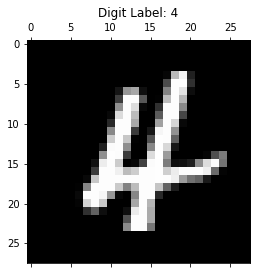

In [4]:
# Use matshow() function to plot the arrays
# the chosen color scheme is gray
plt.matshow(digit(x), cmap=plt.cm.gray)

# set the title of the figure to the label that is specific
# to the randomly chosen row.
plt.title("Digit Label: %d" % data_df['label'].iloc[x])
plt.show()

The above plot allows us to visualise the digit much clearly given the randomly chosen row of pixel data.

In [5]:
# View the distribution of digits in the training set.
# from the description we know there are digits from 0
# to and including 9. 
# use value_counts() to obtain the number of rows that 
# are assinged the same label. 
# sort the labels in ascending order
label_df = data_df['label'].value_counts().sort_index()
label_df

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

We can see the quantity of labels is almost evenly distributed. Digit 5 has the least number of occurences and digit 1 has the most number of occurences.

#### Assign the X and y variables

In supervised machine learning a labeled dataset is used to train an algorithm so that given an unseen dataset the algorithm classifies the data and predicts the labels. Define the X and y variables within the training set. The X variable is defined by the pixel data in the training set and the y variable is defined by the label column in the training set.

In [6]:
# assign the pixel data to the X variable.
# drop the label coloumn and obtain the values in
# the remaining columns
X = data_df.drop(['label'], axis=1).values

# View the X-variable
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
# assign the label column to the y variable
y = data_df['label'].values

# view the y-variable
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

#### Create a validation set

The X and y variable have been defined above. To obtain the validation, split the training set into 75% training data and 25% validation data. Take care to not have a training set that is smaller than the already defined test set.

In [8]:
# Import the required functions and modules.
# From the Scikit-Learn package import the 
# train_test_split function to split the training 
# set.
from sklearn.model_selection import train_test_split

# set the test size to 0.25.
# In this case we are splitting into training and validation sets
# Set shuffle to True, in order to achieve an even distribution of 
# pixel data within the training and validation set.
# Use the stratify parameter to ensure there is an equal 
# proportion of labels in the sets.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, 
                                                    shuffle = True, stratify = y, random_state=8)

# View the shape of the each split set
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(31500, 784)
(10500, 784)
(31500,)
(10500,)


The training set is made up of 31500 observations and the validation set contains 10500 observations. 

Define the X_test variable to be the pixel data contained in test.csv. Take note that test.csv has no column 'label'. Our chosen algorithm should accurately predict the labels given the pixel data of X_test.

In [9]:
# Define the X_test variable.
X_test = test_df.values
# View the X-test variable
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Classification Algorithms

Classification algorithms recognize specific groups within a test dataset and assign specific labels onto the data. Ensemble methods involve aggregating multiple machine learning models with the aim of decreasing both bias and variance. Given the pixel data the algorithm should accurately predict the digit formed by the pixel data.

##### Random Forest Model

The Random Forest algorithm is a bagging ensemble method, where multiple trees are built independently, that is multiple classification trees are grown. In Random Forest, we grow a large number of trees and then average their predictions to get a final result. Each tree gives a classification, and we say the tree "votes" for that class. The forest chooses the classification having the most votes (over all the trees in the forest). Taking the average of many trees that are uncorrelated leads to reduced variance, thus the Random Forest model is reliable.

##### Adaptive Boosted Model

Each model focuses on the errors of the previous model. The subsequent model may make new mistakes that the first one did not
as a result of the weighting. Each model is a specialist on some subset of the data: in itself quite weak, but a ‘boost’ to the performance of the ensemble. Boosting algorithms avoid misclassification and may improve permoance of a model.

In [10]:
# Import the required classifier from the ensemble
# module in the Scikit-Learn package.
from sklearn.ensemble import RandomForestClassifier

# Import the adaptive boosted classifier from the ensemble
# module. Import the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Import the accuracy_score from the metrics module in
# scikit-learn
from sklearn.metrics import accuracy_score

The total number of trees to grow is controlled by the parameter n_estimators. Also, at the nodes of the trees, instead of looking for the best split by testing all features, a random sample of features is made and the corresponding splits based on only those is tested. The number of features to include in the random sample at each split is controlled by the parameter max_features. Finally, the parameter max_depth controls the maximum depth (number of splits along the longest branch) of the trees. 

Let's tune the number of trees to grow and at what depth each tree will grow to, by finding the values for n_estimators and max_depth that perform best. Higher number of trees give you better performance but the programme runs much slower however we obtain stronger and stable predictions. 

#### Tune the max_depth, n_estimators

In [11]:
# Define an empty list for max_depth,
max_depth = []

# define an empty list to store the accuracies obtained
# using the random forest model
rf_acc = []

# define an empty list to store the accuracies obtained
# using the boosted model
adaboost_acc = []

# Our range defines the limits for our max_depth levels
for i in range(2,15):
    
    # Initialise a Random Forest classifier
    # set the number of tree to grow to 100 and
    # do not set the maximum depth of each tree
    rf_clf = RandomForestClassifier(max_depth=i, n_estimators=100, random_state= 32)

    # train the model using the training sets
    # use the fit() function
    train_rf = rf_clf.fit(X_train, y_train)
    
    # use the Random forest model to predict the labels of the 
    # validation set given the pixel data contained in the validation set.
    # Use the predict function found in the Scikit-learn package
    y_pred = train_rf.predict(X_val)
    
    # append the accuracy score to the list
    # rf_acc. 
    rf_acc.append(accuracy_score(y_val, y_pred))

    # Initialise adaptive boosted classifier
    ad_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=32, max_depth = i), 
                                n_estimators= 10, random_state= 32)

    # Fit the model with the training set
    train_ad_clf = ad_clf.fit(X_train, y_train)
    
        
    # predict the labels of the validation using the trained 
    # adaptive boosted model
    ad_pred = train_ad_clf.predict(X_val)
    
    # append the accuracy score to the list
    # adaboost_acc
    adaboost_acc.append(accuracy_score(y_val, ad_pred))

    # after each accuracy score for both models
    # set is computed, append the corresponding max_depth
    # level to the list for max_depth.
    max_depth.append(i)
    
# Define a new dataframe that consists of 
# max_depth, rf_acc and adaboost_acc as columns
# such that for each max_depth we have a corresponding 
# accuracy score for each model

# Using a dictionary, where the keys are the column 
# names and the values are numpy arrays of the calculated 
# max_depth and accuracies.
data = pd.DataFrame({'rf_acc':pd.Series(rf_acc), 
 'adaboost_acc':pd.Series(adaboost_acc),
 'max_depth':pd.Series(max_depth)})



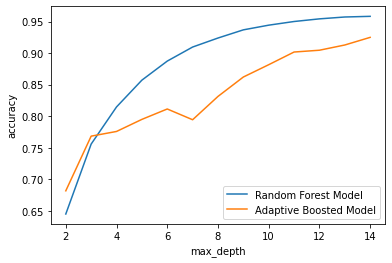

In [19]:
# visualizing the accuracies at each max_depth level
# Create plots using the pyplot function.

# Plot the accuracies of the trained set.
# On the x-axis is max_depth and the accuracies 
# are plotted on the y-axis.
# Using data from the DataFrame above.
plt.plot('max_depth', 'rf_acc', data=data, label='Random Forest Model')

# Plot the accuracies of the boosted model
plt.plot('max_depth','adaboost_acc', data=data, label='Adaptive Boosted Model')

# Label for the x-axis
plt.xlabel('max_depth')

# Label for the x-axis
plt.ylabel('accuracy')
plt.legend()

The random forest model will grow 100 trees and reach a max_depth level of 14. From the plot above, note that the accuracy score of the Random Forest score, indicated by the blue line, steadily increases as the depth levels increase. The graph seems to flatline at max_depth=14, with the accuracy score being above 95%.

The adaptive boosted model will grow 10 trees. The orange graph in the above plot indicates the accuracy score of the boosted model given different depth levels. From the graph, note that the accuracy increases for depth levels 2 to 6, and dips for depth level 7. However the accuracy of the model starts to increase for depth levels greater than 8. The boosted model acchieves an accuracy score of above 90% at depth level 14.

### Confusion Matrices

A confusion matrix is used to determine the number of a classifier's predictions that were correct and the number of predictions that were incorrect.  The rows of the confusion matrix represent the true labels and the columns represent the prediction labels of the classifiers. The diagonal of the matrix represents the number of times the predicted labels matched the true labels.  A confusion matrix can help to identify where the model may need more training.

Plot a confusion matrix for each model to determine the performance of each model. 

In [13]:
# Import the confusion_matrix form the metrics module in
# scikit-learn
from sklearn.metrics import confusion_matrix
import seaborn as sns # for visualising the matrices.

In [14]:
# Define the random forest model using n_estimators=100
# and max_depth=14
rf2_clf = RandomForestClassifier(max_depth=14, n_estimators=100, random_state= 32)

# train the model using the training sets
train_rf2 = rf2_clf.fit(X_train, y_train)
    
# predict the labels of the test set 
y_pred2 = train_rf2.predict(X_val)

# Define the matrix that will determine the model's performance
# Using the confusion_matrix method, the first argument is
# the actual test set  and the second argument is 
# the predicted labels given by the model.
rf_matrix = confusion_matrix(y_val, y_pred2)

<AxesSubplot:>

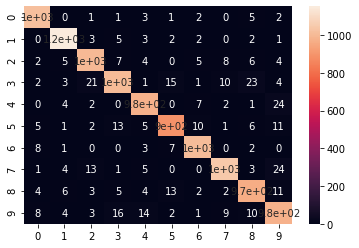

In [15]:
# use the heatmap() function from the seaborn package
# to visualise the confusion matrix.
sns.heatmap(rf_matrix, annot=True)

To gain more insight into the model's perfromance we need to calculate the precision, recall and F1-score. Let's use classification_report() from the Scikit-Learn package, this report will list the precision, recal and F1-score of the model for each class.

In [16]:
# Import the required functionalities from the 
# sklearn metrics module
from sklearn.metrics import classification_report

# print the classification report 
print(classification_report(y_val, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1033
           1       0.98      0.98      0.98      1171
           2       0.95      0.96      0.96      1044
           3       0.95      0.93      0.94      1088
           4       0.96      0.96      0.96      1018
           5       0.96      0.94      0.95       949
           6       0.97      0.98      0.98      1034
           7       0.97      0.95      0.96      1100
           8       0.94      0.95      0.95      1016
           9       0.92      0.94      0.93      1047

    accuracy                           0.96     10500
   macro avg       0.96      0.96      0.96     10500
weighted avg       0.96      0.96      0.96     10500



Precision tells us what percent of the predictions are correct. From above the model achieved high precision for all the digits, however digit '9' had the lowest precision score. The digits 3, 5 and 9 recieved the lower recall scores. Recall gives us the pecernt of the positive cases the model was able to catch. 

<AxesSubplot:>

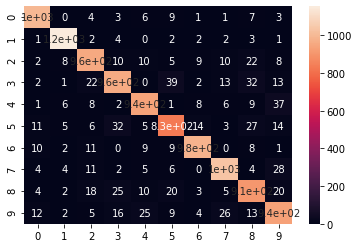

In [17]:
# Define the adaptive boosted model using n_estimators= 10
# max_depth=14
ad_clf2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=32, max_depth = 14), 
                                n_estimators= 10, random_state= 32)

# Fit the model with the training set
train_ad_clf2 = ad_clf2.fit(X_train, y_train)
            
# predict the labels of the validation set
ad_pred2 = train_ad_clf2.predict(X_val)


# Define the confusion matrix for the model. 
ad_matrix = confusion_matrix(y_val, ad_pred2)

# Plot the confusion matrix to visualise the perfomance of the model.
# use the heatmap() function from the seaborn package
sns.heatmap(ad_matrix, annot=True)

To gain more insight into the model's perfromance we need to calculate the precision, recall and F1-score. Let's use classification_report() from the Scikit-Learn package.

In [18]:
# print the classification report for the adaboost model
print(classification_report(y_val, ad_pred2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1033
           1       0.97      0.99      0.98      1171
           2       0.92      0.92      0.92      1044
           3       0.91      0.89      0.90      1088
           4       0.93      0.92      0.93      1018
           5       0.89      0.88      0.88       949
           6       0.96      0.95      0.95      1034
           7       0.94      0.94      0.94      1100
           8       0.88      0.89      0.89      1016
           9       0.88      0.89      0.89      1047

    accuracy                           0.93     10500
   macro avg       0.92      0.92      0.92     10500
weighted avg       0.93      0.93      0.92     10500



The adaptive model struggled to predict correctly the digits 3,5,8 and 9. A recall score of 88% was achieved for the digits 5 and a score of 89% for digits 3, 8 and 9. 

The above classification report indicates that the f1_scores achieved are much lower than that of the Random Forest above. The lowest f1_score for the random forest was 93% whereas the adaptive boosted model achieved an f1_score of 88% for digit 5. The overall scores for the Adaptive boosted model are much lower than the scores achieved by the Random Forest Model. 

I would use the Random Forest model to predict the labels of the test set.

#### Bibliography

1. CSV Datasets - https://www.kaggle.com/competitions/digit-recognizer/overview

2. Plot the digits - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.matshow.html

3. Battle of the Ensemble 

- https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm

- https://towardsdatascience.com/battle-of-the-ensemble-random-forest-vs-gradient-boosting-6fbfed14cb7

- https://www.datacamp.com/community/tutorials/adaboost-classifier-python

- https://www.mygreatlearning.com/blog/adaboost-algorithm/

4. Classification Report - https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56